In [26]:
import pandas as pd
import warnings
import locale
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from Demos.mmapfile_demo import offset

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

C:\Users\marci\AppData\Local\Temp\tmprpryfuhd 32768 tmprpryfuhd


'pt_BR.UTF-8'

In [45]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
GREEN1, GREEN2,GREEN3,GREEN4, GREEN5 = '#006c00','#077b4d','#32a58b','#15ab92','#9ddbc9'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

## Data Wrangling

In [2]:
caminho = 'dados/Finbra Despesas Orçamentárias e Por Função.xlsx'
dados_desp_orcamentarias = pd.read_excel(caminho, sheet_name='Despesas Orçamentárias')
dados_desp_funcao = pd.read_excel(caminho, sheet_name='Despesa por Função')

# <font color='#03045e'><b><u>Educação</u></b></font>

## Despesas
<hr>

O periodo analisado comprende os anos de 2020 até 2023

In [4]:
df_educacao = dados_desp_funcao[['ANO','DESPESA','Conta','Valor']].copy(deep=True)

In [42]:
df_educacao = df_educacao.loc[df_educacao['Conta'] == '12 - Educação']

df_educacao_empenhadas = df_educacao.loc[df_educacao['DESPESA'] == 'Despesas Empenhadas']
df_educacao_empenhadas.set_index('ANO', inplace=True)

df_educacao_liquidadas = df_educacao.loc[df_educacao['DESPESA'] == 'Despesas Liquidadas']
df_educacao_liquidadas.set_index('ANO', inplace=True)

### Despesas Empenhadas

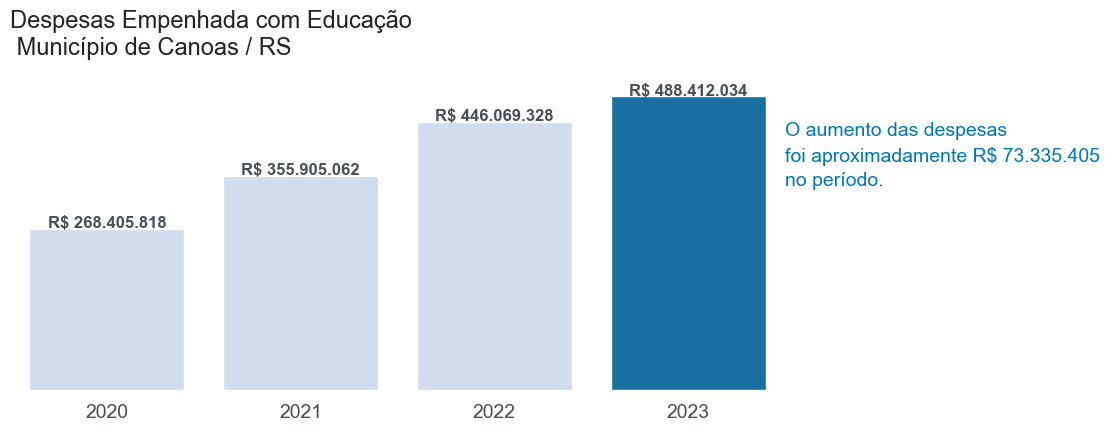

In [41]:
cores = []

for ano in df_educacao_empenhadas.index:
	if df_educacao_empenhadas.loc[ano, "Valor"] == df_educacao_empenhadas['Valor'].max():
		cores.append(AZUL2)
	else:
		cores.append(AZUL5)

fig, ax = plt.subplots(figsize=(10, 4))
sns.set_theme(style='white')


ax = sns.barplot(data=df_educacao_empenhadas, x=df_educacao_empenhadas.index, y='Valor', palette=cores)

ax.set_title("Despesas Empenhada com Educação\n Município de Canoas / RS", loc="left", fontsize=17, color=CINZA1, pad=20)
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
sns.despine(left=True, bottom=True)
ax.set_yticklabels([])

for i, valor in enumerate(df_educacao_empenhadas['Valor']):
    qtd = f'R$ {valor:,.0f}'.replace(',','.')
    offset = 1e7
    ax.text(x=i, y=valor + offset, s=qtd, color=CINZA2, ha='center', va='center', fontsize=12, fontweight='bold')
    
df_educacao_empenhadas['Diferenca'] = df_educacao_empenhadas['Valor'].diff()
media = f'R$ {df_educacao_empenhadas['Diferenca'].mean():,.0f}'.replace(',','.')


ax.text(3.5, 340.5e6,
        'O aumento das despesas\n'
        f'foi aproximadamente {media}\n'
        'em média no período.',
        fontsize=14, linespacing=1.45, color=AZUL2)



plt.show()

### Despesas Liquidadas

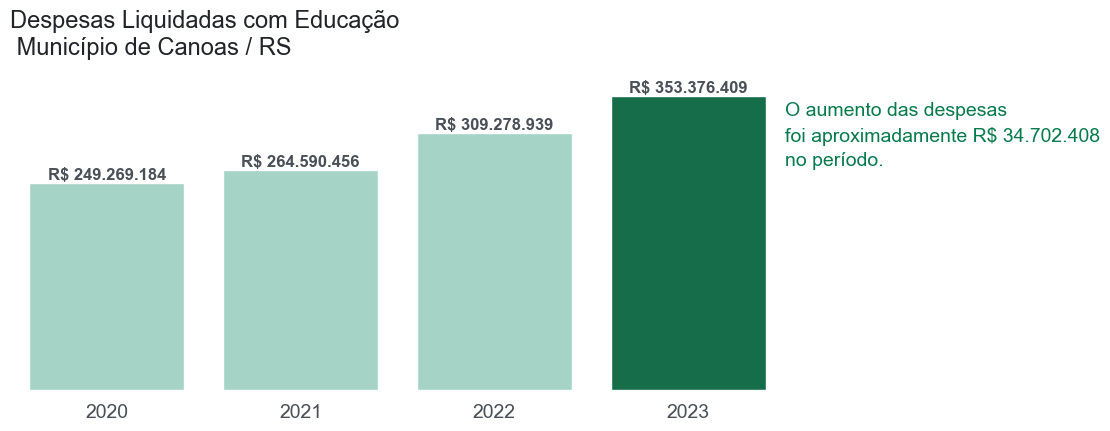

In [52]:
cores = []

for ano in df_educacao_liquidadas.index:
	if df_educacao_liquidadas.loc[ano, "Valor"] == df_educacao_liquidadas['Valor'].max():
		cores.append(GREEN2)
	else:
		cores.append(GREEN5)

fig, ax = plt.subplots(figsize=(10, 4))
sns.set_theme(style='white')


ax = sns.barplot(data=df_educacao_liquidadas, x=df_educacao_liquidadas.index, y='Valor', palette=cores)

ax.set_title("Despesas Liquidadas com Educação\n Município de Canoas / RS", loc="left", fontsize=17, color=CINZA1, pad=20)
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
sns.despine(left=True, bottom=True)
ax.set_yticklabels([])

for i, valor in enumerate(df_educacao_liquidadas['Valor']):
	qtd = f'R$ {valor:,.0f}'.replace(',','.')
	offset = 1e7
	ax.text(x=i, y=valor + offset, s=qtd, color=CINZA2, ha='center', va='center', fontsize=12, fontweight='bold')

df_educacao_liquidadas['Diferenca'] = df_educacao_liquidadas['Valor'].diff()
media = f'R$ {df_educacao_liquidadas['Diferenca'].mean():,.0f}'.replace(',','.')


ax.text(3.5, 270.5e6,
        'O aumento das despesas\n'
        f'foi aproximadamente {media}\n'
        'em média no período.',
        fontsize=14, linespacing=1.45, color=GREEN2,)



plt.show()

### Relação entre despesa empenhada e despesa liquidada

## Origem da Receita com Educação
<hr>

In [61]:
df_receitas = pd.read_excel("dados/Finbra Receitas.xlsx")

In [67]:
receitas_correntes = df_receitas.copy(deep=True)
receitas_correntes = receitas_correntes.loc[receitas_correntes['RECEITAS'] == 'Receitas Brutas Realizadas']
receitas_correntes = receitas_correntes.loc[receitas_correntes['Conta'] == '1.0.0.0.00.0.0 - Receitas Correntes']

In [68]:
receitas_correntes

,ANO,RECEITAS,Conta,Identificador da Conta,Valor
1,2023,Receitas Brutas Realizadas,1.0.0.0.00.0.0 - Receitas Correntes,siconfi-cor_RO1.0.0.0.00.0.0,2087629123.750
188,2022,Receitas Brutas Realizadas,1.0.0.0.00.0.0 - Receitas Correntes,siconfi-cor_RO1.0.0.0.00.0.0,2140231360.180
374,2021,Receitas Brutas Realizadas,1.0.0.0.00.0.0 - Receitas Correntes,siconfi-cor_RO1.0.0.0.00.0.0,2123240844.780
553,2020,Receitas Brutas Realizadas,1.0.0.0.00.0.0 - Receitas Correntes,siconfi-cor_RO1.0.0.0.00.0.0,1830414736.510
